

 **Author**: Yao Lai
 
 **Data Set**: movies.csv 
 
 **Goal**: find any useful information in the dataset, give some insight 
 
 **Update List**: 
 
     1. Oct17 load dataset and have a general look
     2. Oct19 plot heatmap, found out that we need to deal with missing data and replace some string data to numerical
     3. Oct20 trying to dealing with missing data and transform data
     4. Oct24 having COVID, trying to continue to job -- dealing with the missing data

## To-do List
- We need to handle the missing data. Replace, ignore or using EM algorithm, not using EM algorithm this time
- Do we need to transform the data so we can find some insight
- we want to dealing with date data to_datetime() method
- After 1 and 2, we can display the data
- change the name

In [1]:
# import relevant packages as usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
# notice: I have changed the columns name replace 'space' by '_', make it easy to operate through the .csv file
pd_movies = pd.read_csv('movies.csv')

In [3]:
# Have a general picture of the movie dataset
# shape
pd_movies.shape

(3201, 16)

In [4]:
# using df.head() to see the first 5 rows
pd_movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,G,Running_Time,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [5]:
# info
pd_movies.info()

# As you can see, there are lost of columns have less than 3201 row is non-null
# And there are many non-numerical columns
# So we might need to find a way to deal with the missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3201 non-null   object 
 1   US_Gross                3201 non-null   object 
 2   Worldwide_Gross         3201 non-null   object 
 3   US_DVD_Sales            564 non-null    float64
 4   Production_Budget       3200 non-null   float64
 5   Release_Date            3201 non-null   object 
 6   G                       2596 non-null   object 
 7   Running_Time            1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major_Genre             2926 non-null   object 
 11  Creative_Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten_Tomatoes_Rating  2321 non-null   float64
 14  IMDB_Rating             2988 non-null   

## Preprocess Data

### PD : US_Gross & Worldwide_Gross

    1. Something we notice in the .info() is that the Dtype of US_Gross and Worldwide_Gross is object, which while we looking at the dataset, the most of value of US_Gross and Worldwide_Gross is numercial, just few rows appears Unknown and 0. We will replace the Unknown to 0 and keep the 0.

In [6]:
# convert the US_Gross and Worldwide_Gross into numeric type
# pd.to_numeric convert non-numeric type to the most suitable numeric type
#pd_movies[['US_Gross','Worldwide_Gross']] = pd_movies[['US_Gross','Worldwide_Gross']].apply(pd.to_numeric)

# 1 .replace the 'Unknown' to 0
pd_movies['US_Gross'] = pd_movies['US_Gross'].replace('Unknown',0)
pd_movies['Worldwide_Gross'] = pd_movies['Worldwide_Gross'].replace({"Unknown":0})

In [7]:
pd_movies['US_Gross'][118]

0

In [8]:
# 2. pd.to_numeric convert non-numeric type to the most suitable numeric type
pd_movies[['US_Gross','Worldwide_Gross']] = pd_movies[['US_Gross','Worldwide_Gross']].apply(pd.to_numeric)

In [9]:
pd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   3201 non-null   object 
 1   US_Gross                3201 non-null   int64  
 2   Worldwide_Gross         3201 non-null   int64  
 3   US_DVD_Sales            564 non-null    float64
 4   Production_Budget       3200 non-null   float64
 5   Release_Date            3201 non-null   object 
 6   G                       2596 non-null   object 
 7   Running_Time            1209 non-null   float64
 8   Distributor             2969 non-null   object 
 9   Source                  2836 non-null   object 
 10  Major_Genre             2926 non-null   object 
 11  Creative_Type           2755 non-null   object 
 12  Director                1870 non-null   object 
 13  Rotten_Tomatoes_Rating  2321 non-null   float64
 14  IMDB_Rating             2988 non-null   

## PD: Release_Date
    
    1. using to_datetime() to unify the Release_Date columns
    2. hard to change

In [10]:
# replace ['Jan','Feb','Mar','Apr','May','Jul','Aug','Sep','Oct','Nov','Dec']
monthList = ['%d-Jan-%d','%d-Feb-%d','%d-Mar-%d','%d-Apr-%d','%d-Mar-%d','%d-Jun-%d','%d-Jul-%d','%d-Aug-%d','%d-Sep-%d','%d-Oct-%d','%d-Nov-%d','%d-Dec-%d']
num_monthList = ['%d-1-%d','%d-2-%d','%d-3-%d','%d-4-%d','%d-5-%d','%d-6-%d','%d-7-%d','%d-8-%d','%d-9-%d','%d-10-%d','%d-11-%d','%d-12-%d']
pd_movies['Release_Date'] = pd_movies['Release_Date'].replace(monthList,num_monthList)

# it doesn't work, seems we need to seperate the data

In [11]:
pd_movies['Release_Date'].head()

0    12-Jun-98
1     7-Aug-98
2    28-Aug-98
3    11-Sep-98
4     9-Oct-98
Name: Release_Date, dtype: object

In [12]:
# create a empty list

new_ReleaseDate = []

# define a month method
def StrMonth_to_int(argument):
    switcher = {
        'Jan':'01',
        'Feb':'02',
        'Mar':'03',
        'Apr':'04',
        'May':'05',
        'Jun':'06',
        'Jul':'07',
        'Aug':'08',
        'Sep':'09',
        'Oct':'10',
        'Nov':'11',
        'Dec':'12'
    }
    return switcher.get(argument,"nothing")
 
# For loop pd_movies['Relase_Date']
for date in pd_movies['Release_Date']:
    
    # if contain '-'
    if '-' in date:
        # yes, is 31-Jan-99 format
        new_date = date.split('-') #  generate a list 
        # 1 = day, 2 = month, 3 = year
        day = new_date[0]
        month = new_date[1]
        year = new_date[2]
        # change day to xx or 0x format
        if int(day) < 10:
            day = '0' + day
        # change Jan to 1
        month = StrMonth_to_int(month)
        # change 99 to 1999 if ? > 22
        if int(year) > 22:
            year = '19' + year
        else :
            year = '20' + year
        # combie and convert to 1999-01-31
        date = year + month + day
        new_ReleaseDate.append(date)
        print(date)

    elif date == 'TBD':
        date = '20000101'
        new_ReleaseDate.append(date)
        print(date)
    # not, is 1975 format
    else :
        # convert to 1975-01-01
        date = date + '01' + '01'
        new_ReleaseDate.append(date)
        print(date)
        
# assign the new_ReleaseDate to pd_movies['Release_Date']
pd_movies['Release_Date'] = new_ReleaseDate

19980612
19980807
19980828
19980911
19981009
19990115
19990404
19990409
19860701
19461231
19631007
19681211
19621225
19700923
19870301
20200917
19440801
19700101
19561005
19570413
19951227
19721109
19791214
20070629
19680402
19541223
20161224
19980415
19990730
20080403
19871125
19940506
20050928
19330309
19951225
19810522
19940309
20061018
19630101
19860221
20080704
19890809
19880212
19940204
19951110
19860327
19990326
19500517
19510728
19950825
19601024
19380101
19930115
20030124
19730811
19870101
19951117
19770420
20000908
19930402
19600101
19790815
19900718
20071225
20071019
19710101
20070601
19561017
19681010
19750101
19870101
19950804
20060324
19940701
19930416
20060804
19850703
19891122
19900524
19691024
19950407
19841026
19530613
19910830
19820820
19251230
19591118
19741115
19950127
19911113
19461121
19830819
20050930
19730101
20091231
19960906
19841205
19870520
19940525
19791221
20080710
19880603
19250101
19910712
20030912
19910101
19880401
19760101
20040220
19820625
19880226
1

19980626
20030725
19980515
20081017
19990813
20050624
20060804
20041217
20030912
20051223
20081205
19980612
20050930
20080201
20091106
19990312
20060609
20001222
20021225
20031121
19970326
20040723
20000811
20020726
20000512
20050916
19971031
20040416
20020208
20010420
19981120
20000818
20040910
20081010
20050715
20061027
20030627
20001103
19970404
20021227
20051104
20000621
20031225
20051221
20090626
19990901
19981016
20041112
20061225
20100326
20071116
20001215
20080523
20041126
19980313
20000714
20050805
20061215
20050603
20040716
19980410
19981225
20080307
20040903
20001229
20021101
20031225
20060428
20060623
20070105
20021004
20041203
20060721
20021213
20091225
20031225
20050218
20001013
20080222
20071010
20100827
20050114
20021231
20090925
20040806
20040312
20030314
20040806
20080829
20010309
20061110
19970606
20030425
19970808
19970711
20031126
20061110
20011012
20090206
20040220
20060908
19970815
20091009
19991208
20060901
19961004
20100226
19991022
20000825
20030228
20020712
2

20030704
20011121
20020906
20010216
20070921
19971031
20080815
20020412
19980612
20081017
20010613
20060505
20081024
20051123
20040827
20020719
20010330
20090130
20060401
20060804
19991225
20041006
19990917
20040730
19991022
20001027
20050826
20071121
20030328
19990806
20091009
20081219
20041015
19990514
20030307
20000128
20011214
20080118
20070216
20030701
20090521
20070703
20090624
20090814
20050930
20100219
20100423
20000211
20091106
20021220
20070525
20021127
20080201
20051014
19981223
20001225
20000707
20050909
19991029
20011102
20070309
20070105
19991022
19990528
19990827
20020927
20000211
20031126
20111223
20030820
20000616
19971219
20100709
20030711
20020308
20010330
20071121
20070323
19971219
20011214
20030725
20010615
20040528
19991217
20040116
20010810
20100917
19991119
20100618
20090612
20021127
20001227
20000726
20011005
20080827
20020920
20021018
19990512
20090508
20040618
20051202
20050902
20021011
20091125
20080813
20040514
20020809
20070427
19980605
20060818
20051014
1

In [13]:
pd_movies['Release_Date'].head()

0    19980612
1    19980807
2    19980828
3    19980911
4    19981009
Name: Release_Date, dtype: object

In [14]:
# Using pd.to_datetime to convert the Release_Date to datetime type
pd_movies['Release_Date'] = pd.to_datetime(pd_movies['Release_Date'])

In [15]:
pd_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   3201 non-null   object        
 1   US_Gross                3201 non-null   int64         
 2   Worldwide_Gross         3201 non-null   int64         
 3   US_DVD_Sales            564 non-null    float64       
 4   Production_Budget       3200 non-null   float64       
 5   Release_Date            3201 non-null   datetime64[ns]
 6   G                       2596 non-null   object        
 7   Running_Time            1209 non-null   float64       
 8   Distributor             2969 non-null   object        
 9   Source                  2836 non-null   object        
 10  Major_Genre             2926 non-null   object        
 11  Creative_Type           2755 non-null   object        
 12  Director                1870 non-null   object  

In [16]:
# Add new columns show Year and Month it release
pd_movies['Release_Year'] = pd_movies['Release_Date'].dt.year
pd_movies['Release_Month'] = pd_movies['Release_Date'].dt.month

In [17]:
pd_movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,G,Running_Time,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,Release_Year,Release_Month
0,The Land Girls,146083,146083,NaN,8000000.0,1998-06-12,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0,1998,6
1,"First Love, Last Rites",10876,10876,NaN,300000.0,1998-08-07,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0,1998,8
2,I Married a Strange Person,203134,203134,NaN,250000.0,1998-08-28,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0,1998,8
3,Let's Talk About Sex,373615,373615,NaN,300000.0,1998-09-11,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN,1998,9
4,Slam,1009819,1087521,NaN,1000000.0,1998-10-09,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0,1998,10


## G
    0=G --> General Audiences
    1=PG --> Parental Guidance Suggested
    2=PG-13 --> Parents Strongly Cautioned
    3=R --> Ristricted Under 17 requires accompanying parent or adult guardian
    4=NC-17 --> No One 17 and Under Admitted

In [18]:
pd_movies['G'].unique()

array(['R', nan, 'PG', 'Not Rated', 'PG-13', 'G', 'NC-17', 'Open'],
      dtype=object)

### We want to change nan, Not Rated, Open and missing data to G

In [19]:
# first fill the missing data to 0=G
pd_movies['G'] = pd_movies['G'].fillna(0)

In [20]:
# second replace the data
pd_movies['G'] = pd_movies['G'].replace({'G':0, 'PG':1, 'PG-13':2, 'R':3, 'NC-17':4, 'nan':0, 'Not Rated':0, 'Open':0})

In [21]:
# convert it from object type to int
pd_movies['G'] = pd_movies['G'].apply(pd.to_numeric)
pd_movies['G']

0       3
1       3
2       0
3       0
4       3
       ..
3196    3
3197    3
3198    1
3199    1
3200    2
Name: G, Length: 3201, dtype: int64

In [22]:
# summary statistic
# ?? why us_gross and worldwide_gross don't show. 
# A->? Because US_Gross and worldwide_Gross as you can see above the Dtype is object rather than float64, 
# also the Release_Date
# Maybe we want to change some string to number so we can try to find some relation
pd_movies.describe()

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,G,Running_Time,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,Release_Year,Release_Month
count,3.201000e+03,3.201000e+03,5.640000e+02,3.200000e+03,3201.000000,1209.000000,2321.000000,2988.000000,2988.000000,3201.000000,3201.000000
mean,4.390586e+07,8.515677e+07,3.490155e+07,3.106917e+07,1.780069,110.193548,54.336924,6.283467,29908.644578,1997.903155,6.911590
std,6.252066e+07,1.498363e+08,4.589512e+07,3.558591e+07,1.191791,20.171014,28.076593,1.252290,44937.582335,12.316097,3.491417
min,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,0.000000,46.000000,1.000000,1.400000,18.000000,1925.000000,1.000000
25%,5.383834e+06,8.000000e+06,9.906211e+06,6.575000e+06,1.000000,95.000000,30.000000,5.600000,4828.500000,1996.000000,4.000000
50%,2.193042e+07,3.088578e+07,2.033156e+07,2.000000e+07,2.000000,107.000000,55.000000,6.400000,15106.000000,2001.000000,7.000000
75%,5.606855e+07,9.694754e+07,3.779422e+07,4.200000e+07,3.000000,121.000000,80.000000,7.200000,35810.500000,2005.000000,10.000000
max,7.601676e+08,2.767891e+09,3.525821e+08,3.000000e+08,4.000000,222.000000,100.000000,9.200000,519541.000000,2020.000000,12.000000


## Creative_Type
    'Contemporary Fiction':0, 'Science Fiction':1,
       'Historical Fiction':2, 'Fantasy':3, 'Dramatization':4, 'Factual':5,
       'Super Hero':6, 'Multiple Creative Types':7, 'Kids Fiction':8, nan:9

In [23]:
pd_movies['Creative_Type'].unique()

array([nan, 'Contemporary Fiction', 'Science Fiction',
       'Historical Fiction', 'Fantasy', 'Dramatization', 'Factual',
       'Super Hero', 'Multiple Creative Types', 'Kids Fiction'],
      dtype=object)

In [24]:
pd_movies['Creative_Type'] = pd_movies['Creative_Type'].fillna(9)
pd_movies['Creative_Type'] = pd_movies['Creative_Type'].replace({'Contemporary Fiction':0, 'Science Fiction':1,
   'Historical Fiction':2, 'Fantasy':3, 'Dramatization':4, 'Factual':5,
   'Super Hero':6, 'Multiple Creative Types':7, 'Kids Fiction':8, 'nan':9})
pd_movies['Creative_Type'] = pd_movies['Creative_Type'].apply(pd.to_numeric)

In [25]:
pd_movies['Creative_Type'].head()

0    9
1    9
2    9
3    9
4    0
Name: Creative_Type, dtype: int64

## Major_Genre
    'nan':0, 'Drama':1, 'Comedy':2, 'Musical':3, 'Thriller/Suspense':4,
       'Adventure':5, 'Action':6, 'Romantic Comedy':7, 'Horror':8, 'Western':9,
       'Documentary':10, 'Black Comedy':11, 'Concert/Performance':12

In [26]:
pd_movies['Major_Genre'].unique()

array([nan, 'Drama', 'Comedy', 'Musical', 'Thriller/Suspense',
       'Adventure', 'Action', 'Romantic Comedy', 'Horror', 'Western',
       'Documentary', 'Black Comedy', 'Concert/Performance'], dtype=object)

In [27]:
pd_movies['Major_Genre'] = pd_movies['Major_Genre'].fillna(0)
pd_movies['Major_Genre'] = pd_movies['Major_Genre'].replace({'nan':0, 'Drama':1, 'Comedy':2, 'Musical':3, 'Thriller/Suspense':4,
   'Adventure':5, 'Action':6, 'Romantic Comedy':7, 'Horror':8, 'Western':9,
   'Documentary':10, 'Black Comedy':11, 'Concert/Performance':12})
pd_movies['Major_Genre'] = pd_movies['Major_Genre'].apply(pd.to_numeric)

In [28]:
pd_movies['Major_Genre'].head()

0    0
1    1
2    2
3    2
4    1
Name: Major_Genre, dtype: int64

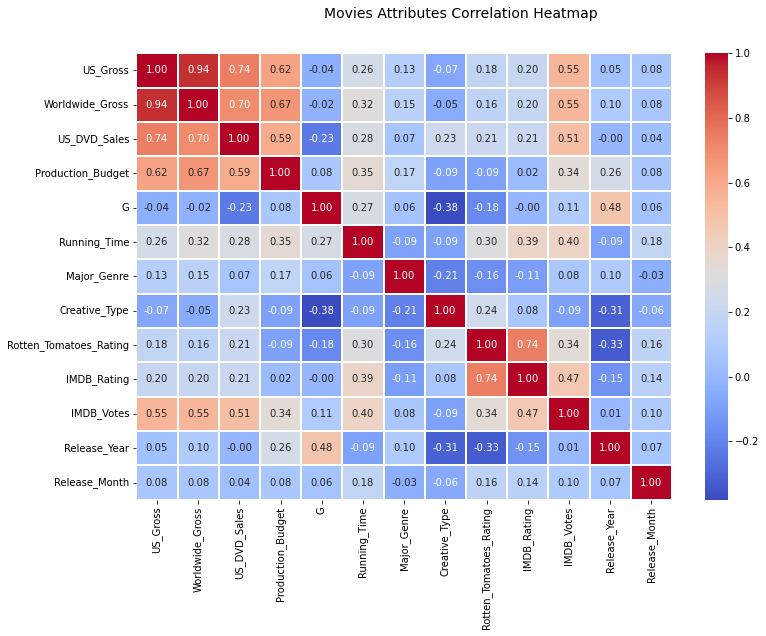

In [29]:
# using heatmap to find the linear correlation relationship among the columns
fig, ax = plt.subplots(figsize = (12,8))
corr = pd_movies.corr()
heatmap_corr = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
fig.subplots_adjust(top=0.9)
title_heatamp_corr = fig.suptitle('Movies Attributes Correlation Heatmap', fontsize=14)

# so as you can see in the heatmap, if the color is more warm, it shows it has strong linear correlation.
# The (Running Time & IMDB Rating/IMDB Votes/Production Budget) has some correlation
# The (US DVD Sales & Production Budget),(US DVD Sales & IMDB Votes),(IMDB Rating & IMDB Votes) has good correlation relationship
# The (Rotten Tomatoes Rating & IMDB Rating) has strong correlation relationship

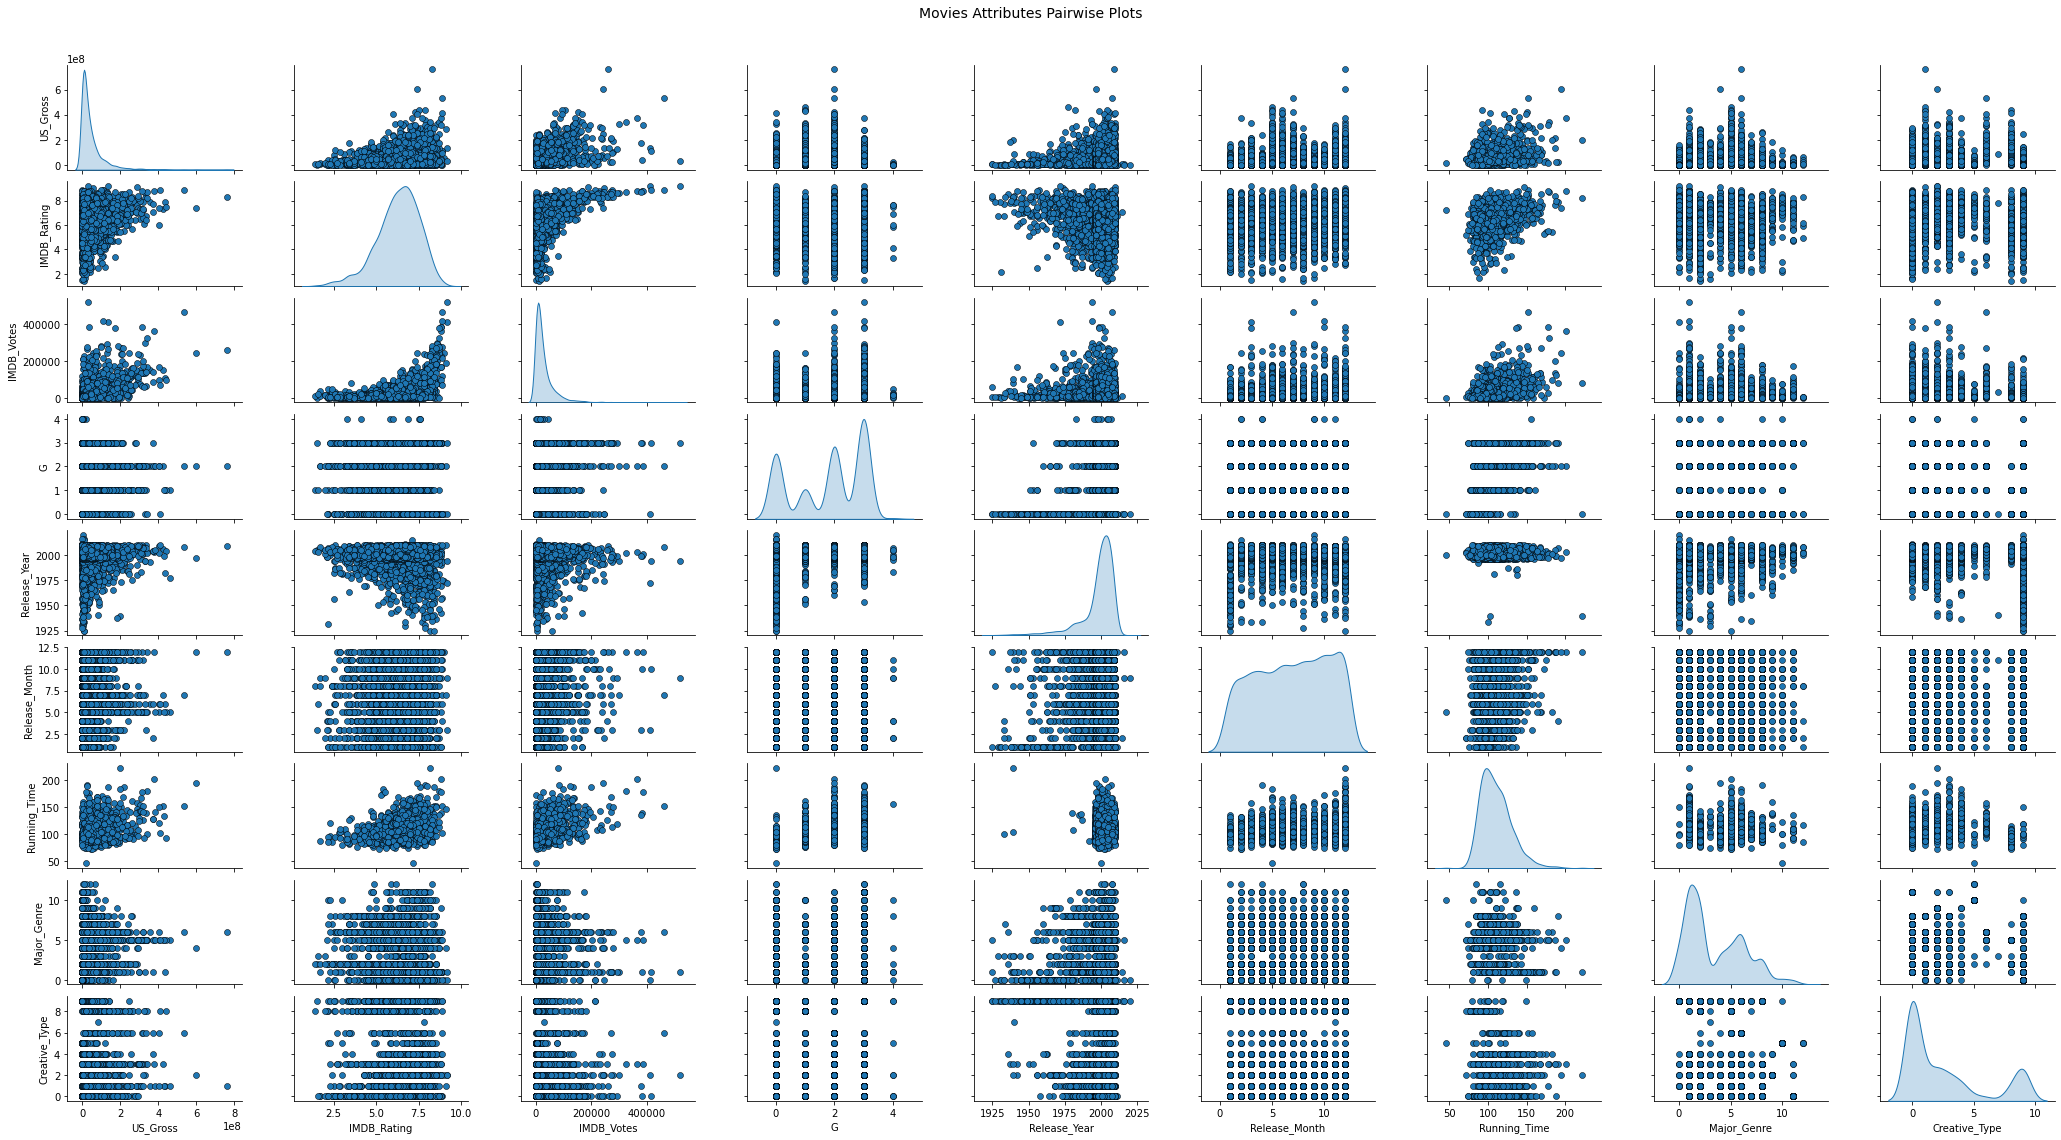

In [31]:
# Pair Plots
cols = ['US_Gross','IMDB_Rating','IMDB_Votes','G','Release_Year','Release_Month','Running_Time','Major_Genre','Creative_Type']
pp = sns.pairplot(pd_movies[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Movies Attributes Pairwise Plots', fontsize=14)

Text(0.5, 0.98, 'Relationship among Major_Genre, Gross and Rating')

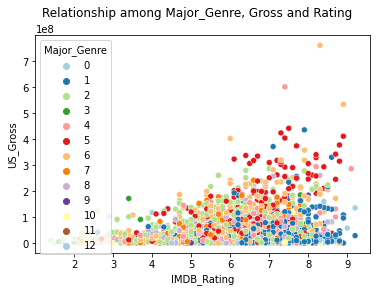

In [35]:
sns.scatterplot(x='IMDB_Rating',y='US_Gross', hue='Major_Genre',data=pd_movies, palette='Paired')
plt.suptitle('Relationship among Major_Genre, Gross and Rating')

Text(0.5, 0.98, 'Relationship among Month, Gross and Rating')

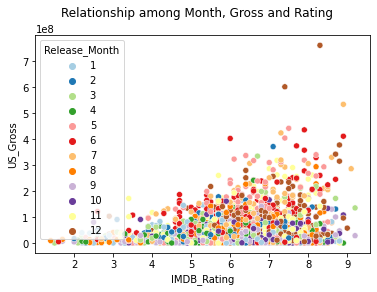

In [36]:
sns.scatterplot(x='IMDB_Rating',y='US_Gross', hue='Release_Month',data=pd_movies, palette='Paired')
plt.suptitle('Relationship among Month, Gross and Rating')

Text(0.5, 0.98, 'Relationship among G, Gross and Rating')

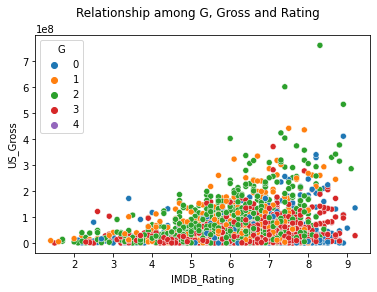

In [39]:
sns.scatterplot(x='IMDB_Rating',y='US_Gross', hue='G',data=pd_movies, palette='tab10')
plt.suptitle('Relationship among G, Gross and Rating')

<AxesSubplot:xlabel='Release_Year', ylabel='G'>

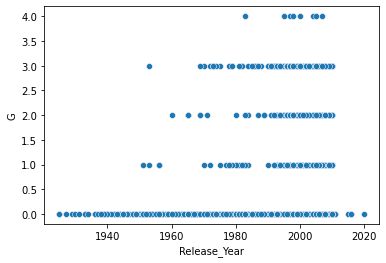

In [40]:
sns.scatterplot(x='Release_Year', y='G', data=pd_movies)

<AxesSubplot:xlabel='Release_Year', ylabel='G'>

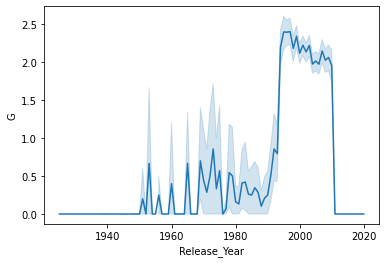

In [41]:
sns.lineplot(x='Release_Year', y='G', data=pd_movies)

Text(0.5, 0.98, 'Relationship between Year and G')

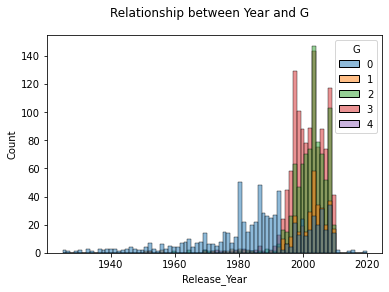

In [44]:
sns.histplot(x='Release_Year',hue='G',data=pd_movies,palette='tab10')
plt.suptitle('Relationship between Year and G')